In [1]:
import sys
from pathlib import Path


import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report
from scipy.stats import entropy


from spnc import spnc_anisotropy
import spnc_ml as ml

In [2]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

def MSE(Y,Y_pred):
    mse = np.mean((Y_pred-Y)**2)
    return mse

def kl_divergence(Y, Y_pred, num_bins=50):
    hist1, bin_edges = np.histogram(Y, bins=num_bins, density=True)
    hist2, _ = np.histogram(Y_pred, bins=num_bins, density=True)
    hist1 += 1e-10
    hist2 += 1e-10
    kl = entropy(hist1, hist2)

    return kl


noise-free, primep1 = none, restart = true

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in fast: 0.49999977789842975
len(K_s): 60000
train_samples: 60000
restarted
noise-free output
Seed Training: 1234
p1 in fast: 0.49999977789842975
len(K_s): 30000
train_samples: 60000
restarted
noise-free output
Spacer NRMSE:0
0.004620522927707696 0.6142236293701125


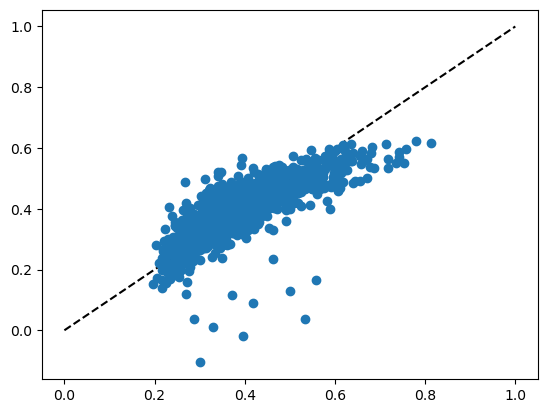

In [3]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
# transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
# (y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in both, primep1 = none, restart = true

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in fast: 0.49999977789842975
len(K_s): 60000
train_samples: 60000
restarted
noisy output
Seed Training: 1234
p1 in fast: 0.49999977789842975
len(K_s): 30000
train_samples: 60000
restarted
noisy output
Spacer NRMSE:0
0.007350504427488697 0.7747106509521734


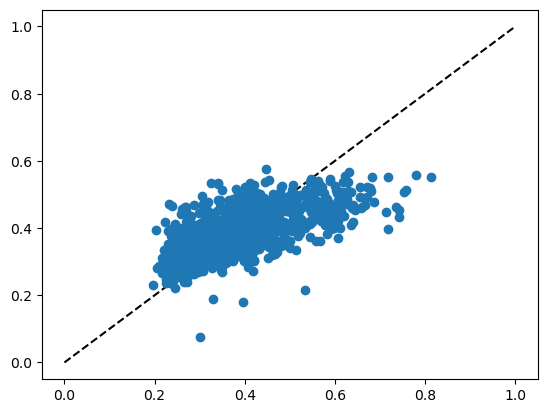

In [6]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
# transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
# (y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

### test the slow version 

noise-free

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 60000
train_samples: 2000
restarted
noise-free output
Seed Training: 1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 30000
train_samples: 2000
restarted
noise-free output
Spacer NRMSE:0
0.005848129223673703 0.6910181194108935


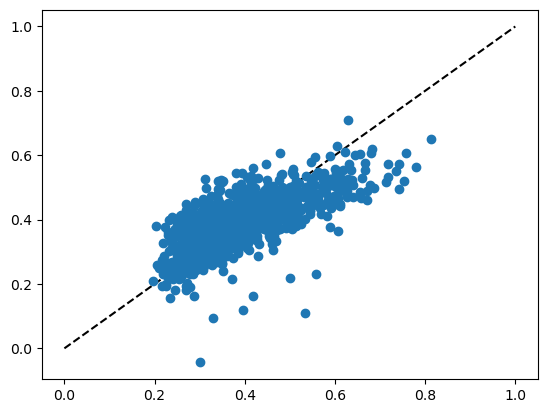

In [7]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
# transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
# (y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in both

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 60000
train_samples: 60000
restarted
noisy output
Seed Training: 1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 30000
train_samples: 60000
restarted
noisy output
Spacer NRMSE:0
0.007080842567105186 0.7603672874015774


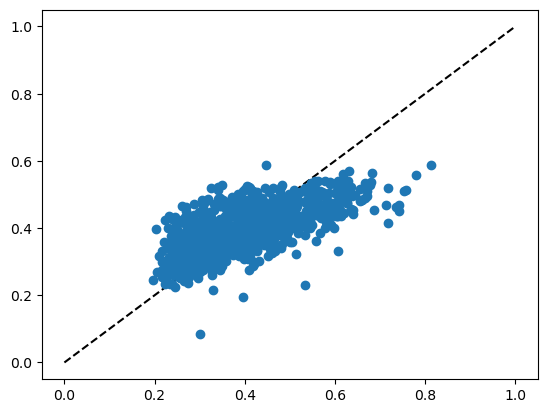

In [10]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
# transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
# (y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

Find out the relationship between noise and performance (baseline is NRMSE=0.6142236293701125, noise-free, fast)

## Exploring the discrepancy on noise across way of adding noise

1. slow; 2. fast; 3. current noise;


create three models

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noise-free testing output
restarted
Spacer NRMSE:0
0.005848129223673703 0.6910181194108935


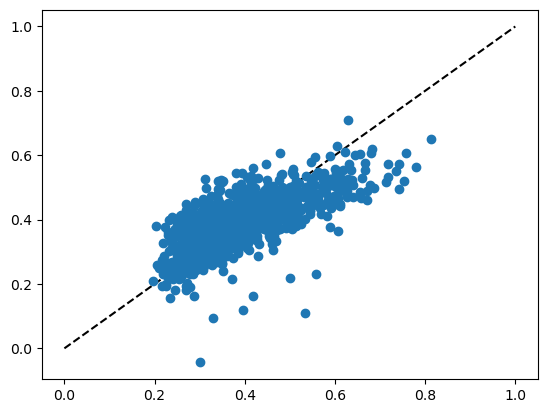

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & fast: 0.49999977789842975
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & fast: 0.49999977789842975
noise-free testing output
restarted
Spacer NRMSE:0
0.004620522927707696 0.6142236293701125


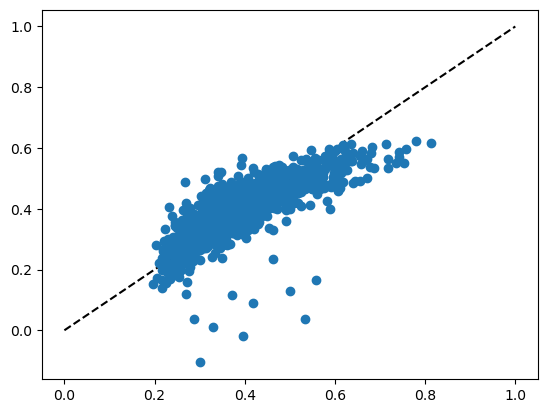

[[ 0.00205052 -0.00039206 -0.00248068 ... -0.00223064 -0.00356316
  -0.00072891]
 [ 0.00137143 -0.00041527 -0.00221017 ... -0.00439223 -0.00518291
  -0.00275502]
 [-0.0005601  -0.00155382 -0.00270319 ... -0.00520583 -0.00590094
  -0.00385673]
 ...
 [-0.0062402  -0.0060583  -0.006147   ... -0.00818059 -0.00826333
  -0.00745764]
 [-0.00565191 -0.00632136 -0.00692852 ... -0.00710174 -0.00770474
  -0.00626072]
 [-0.00528409 -0.00546579 -0.00581366 ... -0.00614431 -0.00637532
  -0.00558264]]
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy testing output
restarted
Spacer NRMSE:0
0.007153372938469028 

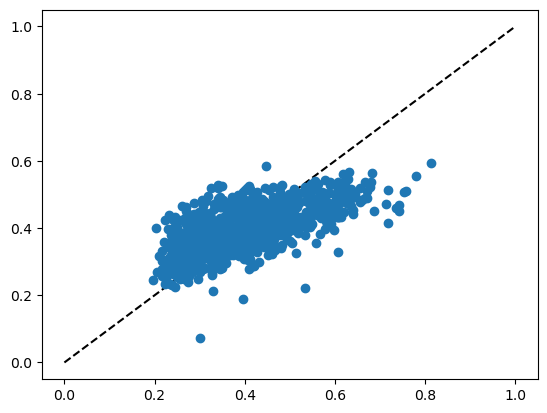

In [4]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.000,
    'noise_std':0.00015,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback
mf = spn.gen_signal_fast_delayed_feedback

train_pred_s = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)
train_pred_f = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,mf,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)

print(train_pred_s)

params['noise_enable'] = 'both'
spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
mn = spn.gen_signal_slow_delayed_feedback
train_pred_n = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,mn,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)







Plot the dif of results between three models

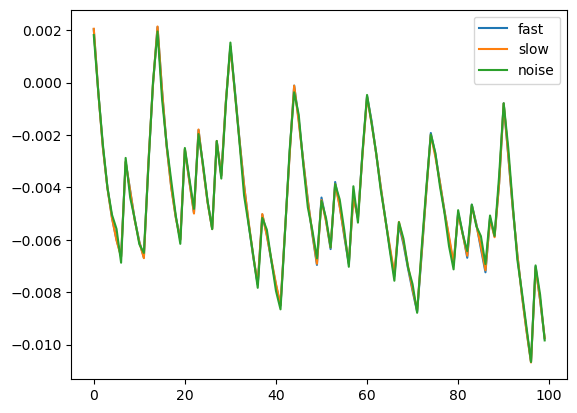

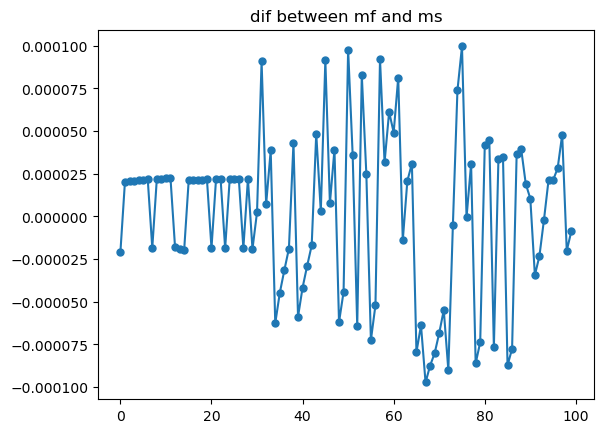

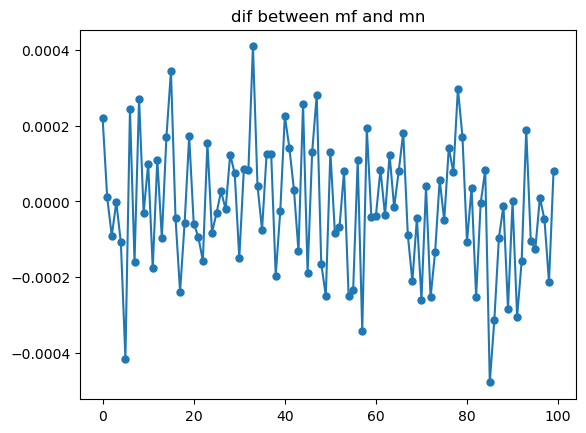

In [92]:
spac = 0
window = 100

# pick up data
s1 = train_pred_s.flatten()
f1 = train_pred_f.flatten()
n1 = train_pred_n.flatten()
# plotting
plt.figure()
plt.plot(f1[spac:spac+window],label='fast')
plt.plot(s1[spac:spac+window],label='slow')
plt.plot(n1[spac:spac+window],label='noise')
plt.legend()
plt.show()

dif_fs = f1-s1
plt.figure()
plt.plot(dif_fs[spac:spac+window],'o-', markersize=5)
plt.title('dif between mf and ms')
plt.show()

dif_fn = f1-n1
plt.figure()
plt.plot(dif_fn[spac:spac+window],'o-', markersize=5)
plt.title('dif between mf and mn')
plt.show()



let's collect all noises

In [ ]:
dif_1d = []


for i in range(30):
# pick up data
    s = train_pred_s[i]
    f = train_pred_f[i]

    dif = (f-s)

    dif_1d.append(dif)
dif_1d = np.array(dif_1d)
dif_1d = dif_1d.flatten()
print(dif_1d.shape)

(900,)


plot the distrbution picture of noise

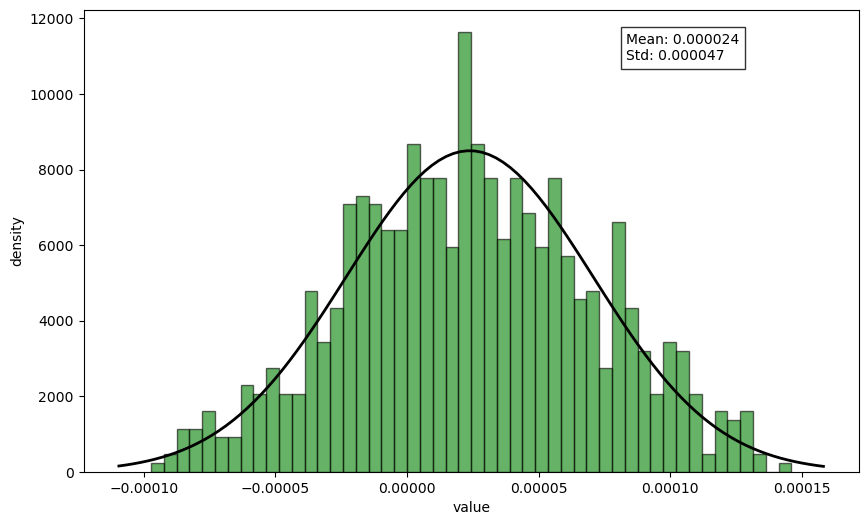

In [87]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


count, bins, ignored = plt.hist(dif_1d, bins=50, density=True, alpha=0.6, color='g', edgecolor='k')

mean_dif = np.mean(dif_1d) 
std_dif = np.std(dif_1d) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_dif, std_dif)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('value')
plt.ylabel('density')
plt.text(0.7, 0.95, f'Mean: {mean_dif:.6f}\nStd: {std_dif:.6f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')


plt.show()

Get a more reasonable value of nose N(0.000024, 0.000047). add it to noise model and see it. Notice: add it in both.

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 2.4e-05
noisy training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 2.4e-05
noise-free testing output
restarted
Spacer NRMSE:0
0.006263460223126876 0.7151351370119321


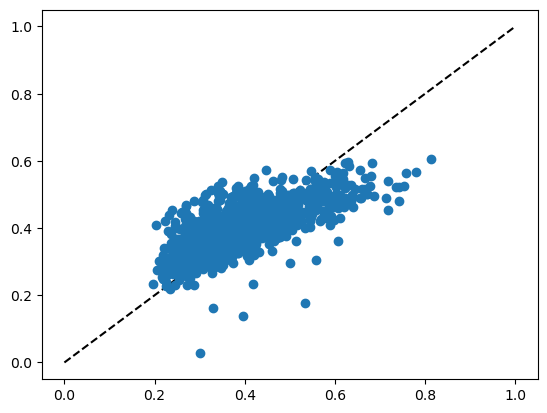

In [5]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'train',
    'noise_seed': 1234,
    'noise_mean':0.000024,
    'noise_std':0.000047,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)

mn = spn.gen_signal_slow_delayed_feedback

nrmse = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,mn,params,seed_NARMA=1234,fixed_mask=True,return_NRMSE=True)

Check the magnitude of noise in test

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noise-free testing output
restarted
Spacer NRMSE:0
0.005848129223673703 0.6910181194108935


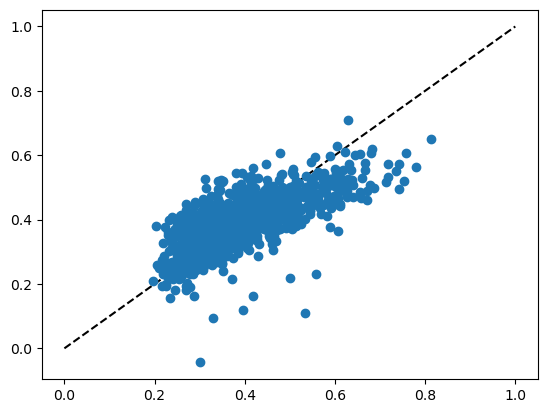

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & fast: 0.49999977789842975
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & fast: 0.49999977789842975
noise-free testing output
restarted
Spacer NRMSE:0
0.004620522927707696 0.6142236293701125


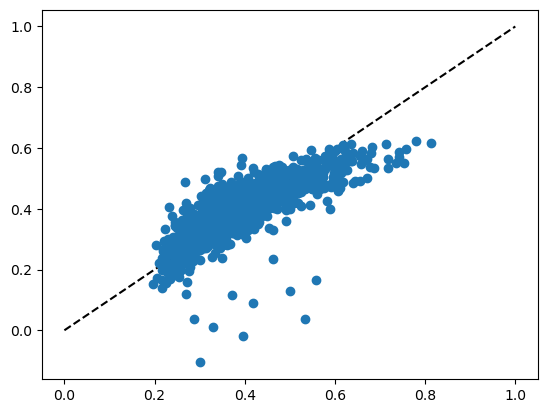

In [6]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.000,
    'noise_std':0.00015,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback
mf = spn.gen_signal_fast_delayed_feedback

(y_test,pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
(y_test,pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,mf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

Plot the noise in test

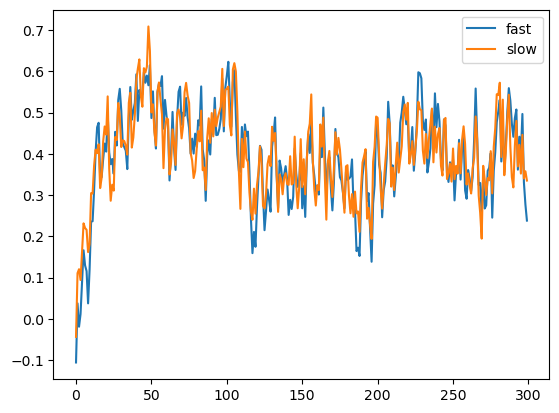

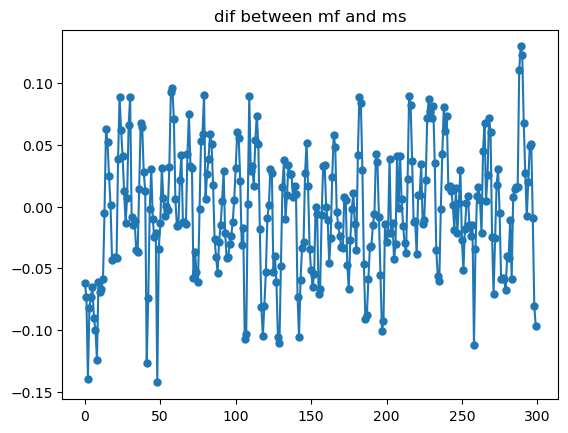

In [8]:
spac = 0
window = 300

# pick up data

# plotting
plt.figure()
plt.plot(pred_f[spac:spac+window],label='fast')
plt.plot(pred_s[spac:spac+window],label='slow')
plt.legend()
plt.show()

dif_pred_fs = pred_f-pred_s
plt.figure()
plt.plot(dif_pred_fs[spac:spac+window],'o-', markersize=5)
plt.title('dif between mf and ms')
plt.show()



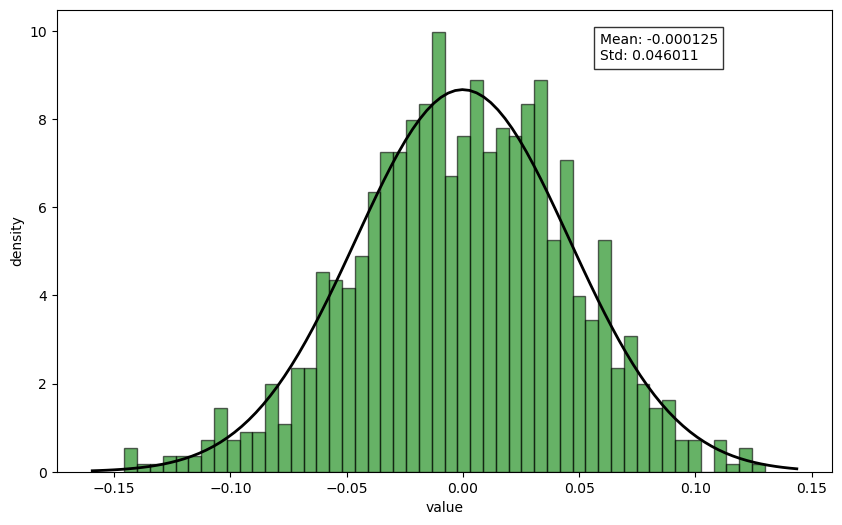

In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


count, bins, ignored = plt.hist(dif_pred_fs, bins=50, density=True, alpha=0.6, color='g', edgecolor='k')

mean_dif = np.mean(dif_pred_fs) 
std_dif = np.std(dif_pred_fs) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_dif, std_dif)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('value')
plt.ylabel('density')
plt.text(0.7, 0.95, f'Mean: {mean_dif:.6f}\nStd: {std_dif:.6f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')


plt.show()

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  1
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: -4.7e-05
noisy training output
restarted
Training data size:  2000
Training data shape:  (2000, 1)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: -4.7e-05
noisy testing output
restarted
Spacer NRMSE:0
0.009026019442989511 0.8584778365784677


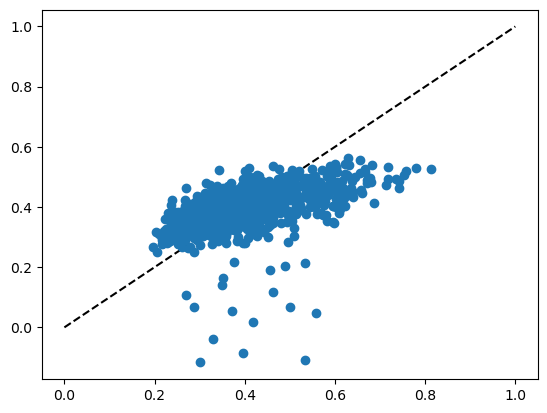

In [6]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 1
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':-0.000047,
    'noise_std':0.000054,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spnn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transformn = spnn.gen_signal_slow_delayed_feedback

# run
y_train_n = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformn,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)

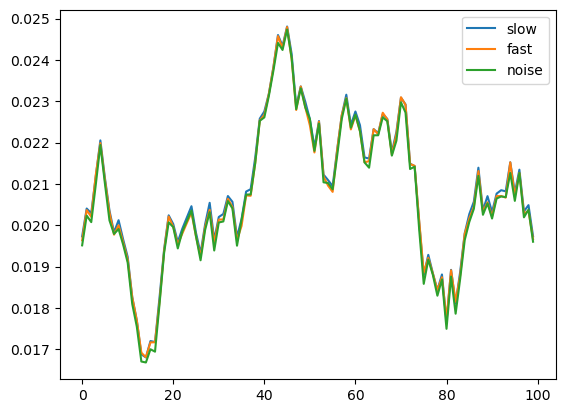

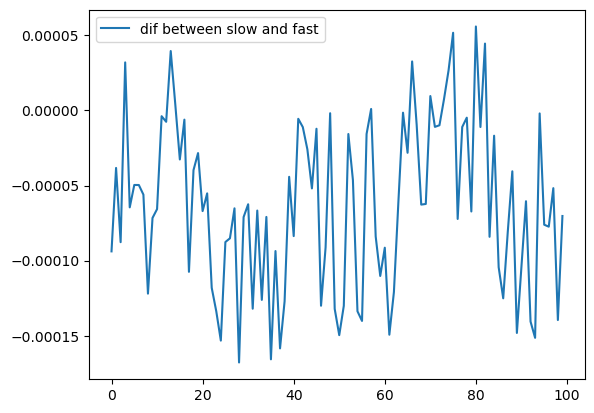

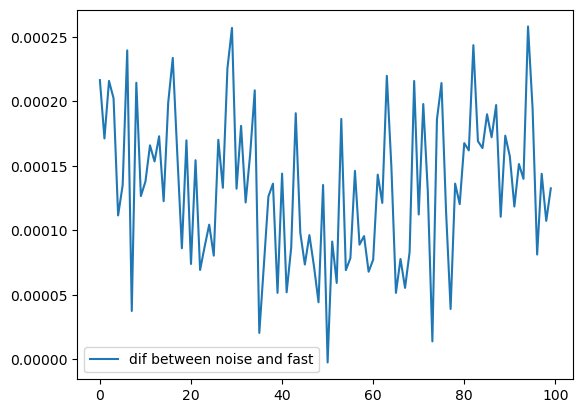

In [7]:
spac = 50
window = 100

plt.figure()
plt.plot(y_train_s[spac:spac+window],label='slow')
plt.plot(y_train_f[spac:spac+window],label='fast')
plt.plot(y_train_n[spac:spac+window],label='noise')
plt.legend()
plt.show()

dif_s_f = y_train_f - y_train_s
plt.figure()
plt.plot(dif_s_f[spac:spac+window],label='dif between slow and fast')
plt.legend()
plt.show()

dif_s_n = y_train_s - y_train_n
plt.figure()
plt.plot(dif_s_n[spac:spac+window],label='dif between noise and fast')
plt.legend()
plt.show()


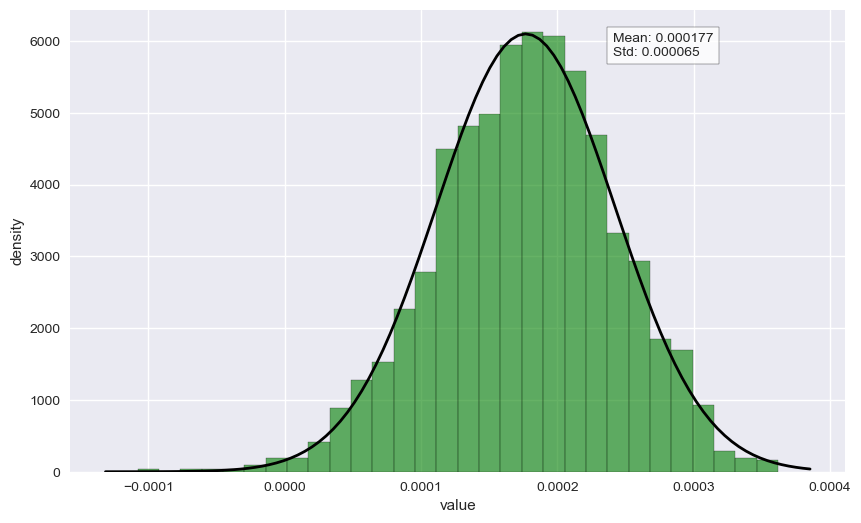

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.figure(figsize=(10, 6))

count, bins, ignored = plt.hist(dif_s_n, bins=30, density=True, alpha=0.6, color='g', edgecolor='k')

mean_dif = np.mean(dif_s_n) 
std_dif = np.std(dif_s_n) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_dif, std_dif)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('value')
plt.ylabel('density')
plt.text(0.7, 0.95, f'Mean: {mean_dif:.6f}\nStd: {std_dif:.6f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')


plt.show()